In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('loan.csv')
df

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [6]:
df.describe()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.shape

(41188, 60)

In [10]:
df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon'

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

In [12]:
df.describe()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df['Loan_Status_label'].value_counts()

Loan_Status_label
0    36548
1     4640
Name: count, dtype: int64

In [20]:
print(round(len(df[df['Loan_Status_label']==0])/len(df),2))
print(round(len(df[df['Loan_Status_label']==1])/len(df),2))

0.89
0.11


In [21]:
df.isnull().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
no_previous_contact              0
not_working                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university

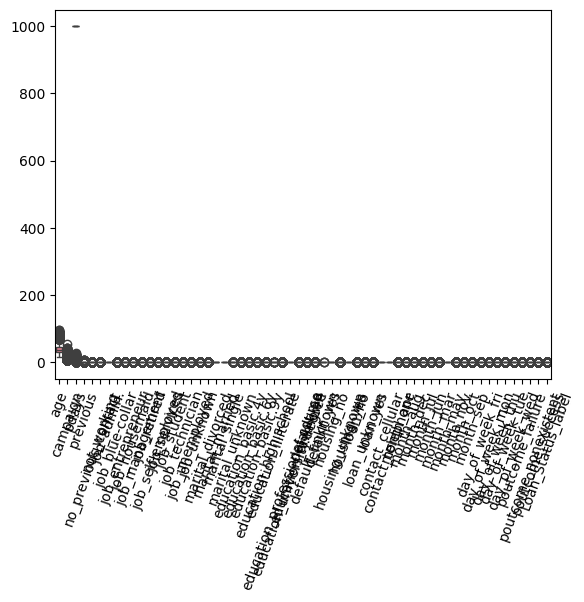

In [34]:
sns.boxplot(df)
plt.xticks(rotation =70)
plt.show()


In [38]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(f'IQR : \n\n{IQR}')



IQR : 

age                              15.0
campaign                          2.0
pdays                             0.0
previous                          0.0
no_previous_contact               0.0
not_working                       0.0
job_admin.                        1.0
job_blue-collar                   0.0
job_entrepreneur                  0.0
job_housemaid                     0.0
job_management                    0.0
job_retired                       0.0
job_self-employed                 0.0
job_services                      0.0
job_student                       0.0
job_technician                    0.0
job_unemployed                    0.0
job_unknown                       0.0
marital_divorced                  0.0
marital_married                   1.0
marital_single                    1.0
marital_unknown                   0.0
education_basic.4y                0.0
education_basic.6y                0.0
education_basic.9y                0.0
education_high.school             0.0
educ

In [41]:
lower_bound= Q1 - 1.5*IQR
upper_bound= Q3 +1.5*IQR
print(f'Lower bound for outliers: \n\n{lower_bound}\n\n')
print(f'Upper bound for outliers :\n\n{upper_bound}n\n')

Lower bound for outliers: 

age                                9.5
campaign                          -2.0
pdays                            999.0
previous                           0.0
no_previous_contact                1.0
not_working                        0.0
job_admin.                        -1.5
job_blue-collar                    0.0
job_entrepreneur                   0.0
job_housemaid                      0.0
job_management                     0.0
job_retired                        0.0
job_self-employed                  0.0
job_services                       0.0
job_student                        0.0
job_technician                     0.0
job_unemployed                     0.0
job_unknown                        0.0
marital_divorced                   0.0
marital_married                   -1.5
marital_single                    -1.5
marital_unknown                    0.0
education_basic.4y                 0.0
education_basic.6y                 0.0
education_basic.9y                 0

In [42]:
df.shape

(41188, 60)

In [43]:
df[((df<lower_bound) | (df>upper_bound)).any(axis=1)]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [44]:
print(lower_bound)
print(upper_bound)

age                                9.5
campaign                          -2.0
pdays                            999.0
previous                           0.0
no_previous_contact                1.0
not_working                        0.0
job_admin.                        -1.5
job_blue-collar                    0.0
job_entrepreneur                   0.0
job_housemaid                      0.0
job_management                     0.0
job_retired                        0.0
job_self-employed                  0.0
job_services                       0.0
job_student                        0.0
job_technician                     0.0
job_unemployed                     0.0
job_unknown                        0.0
marital_divorced                   0.0
marital_married                   -1.5
marital_single                    -1.5
marital_unknown                    0.0
education_basic.4y                 0.0
education_basic.6y                 0.0
education_basic.9y                 0.0
education_high.school    

In [45]:
((df<lower_bound) | (df>upper_bound)).sum()

age                               469
campaign                         2406
pdays                            1515
previous                         5625
no_previous_contact              1515
not_working                      3609
job_admin.                          0
job_blue-collar                  9254
job_entrepreneur                 1456
job_housemaid                    1060
job_management                   2924
job_retired                      1720
job_self-employed                1421
job_services                     3969
job_student                       875
job_technician                   6743
job_unemployed                   1014
job_unknown                       330
marital_divorced                 4612
marital_married                     0
marital_single                      0
marital_unknown                    80
education_basic.4y               4176
education_basic.6y               2292
education_basic.9y               6045
education_high.school            9515
education_il

In [46]:
outliers = df[((df<lower_bound)|(df>upper_bound)).any(axis =1)]
print(outliers.shape)

(41188, 60)


In [47]:
df_no_outliers=df[~((df<lower_bound)|(df>upper_bound)).any(axis=1)]
df_no_outliers.shape

(0, 60)

In [48]:
df.corr()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
age,1.000000,0.004594,-0.034369,0.024365,-0.034292,0.207547,-0.102584,-0.024191,0.031213,0.085403,...,0.040889,0.007148,0.019027,-0.021356,0.019137,-0.023671,-0.002537,-0.016376,0.035626,0.030399
campaign,0.004594,1.000000,0.052584,-0.079141,0.052569,-0.017529,0.011745,-0.001775,-0.002203,0.004226,...,-0.033953,0.026641,0.014405,0.005141,-0.025125,-0.021088,-0.068890,0.087645,-0.050893,-0.066357
pdays,-0.034369,0.052584,1.000000,-0.587514,0.999992,-0.112797,-0.025398,0.065335,0.019246,-0.001649,...,-0.154629,0.013782,0.001031,-0.008186,-0.007300,0.001021,0.006354,0.491353,-0.950700,-0.324914
previous,0.024365,-0.079141,-0.587514,1.000000,-0.587462,0.104066,0.018888,-0.054845,-0.013239,-0.011569,...,0.157651,0.004404,-0.002012,0.001512,0.000090,-0.003929,0.682608,-0.878776,0.524045,0.230181
no_previous_contact,-0.034292,0.052569,0.999992,-0.587462,1.000000,-0.112795,-0.025412,0.065328,0.019247,-0.001638,...,-0.154616,0.013775,0.001009,-0.008187,-0.007282,0.001033,0.006104,0.491357,-0.950283,-0.324877
not_working,0.207547,-0.017529,-0.112797,0.104066,-0.112795,1.000000,-0.180369,-0.166824,-0.059324,-0.050367,...,0.085305,0.002009,-0.005305,-0.002442,0.008890,-0.002960,0.032294,-0.083051,0.104134,0.121246
job_admin.,-0.102584,0.011745,-0.025398,0.018888,-0.025412,-0.180369,1.000000,-0.313313,-0.111417,-0.094595,...,0.010407,0.009892,-0.000736,-0.003970,-0.001835,-0.003112,0.002771,-0.015560,0.025069,0.031426
job_blue-collar,-0.024191,-0.001775,0.065335,-0.054845,0.065328,-0.166824,-0.313313,1.000000,-0.103050,-0.087492,...,-0.054309,0.003329,-0.009754,-0.007062,-0.006829,0.020673,-0.013254,0.043843,-0.061403,-0.074423
job_entrepreneur,0.031213,-0.002203,0.019246,-0.013239,0.019247,-0.059324,-0.111417,-0.103050,1.000000,-0.031113,...,-0.009172,-0.001905,0.006828,0.005551,-0.007275,-0.003480,0.001595,0.007598,-0.017238,-0.016644
job_housemaid,0.085403,0.004226,-0.001649,-0.011569,-0.001638,-0.050367,-0.094595,-0.087492,-0.031113,1.000000,...,-0.003503,-0.007595,0.003365,-0.009014,0.011500,0.001797,-0.017853,0.014629,0.002276,-0.006505


In [53]:
df.corr()['Loan_Status_label']

age                              0.030399
campaign                        -0.066357
pdays                           -0.324914
previous                         0.230181
no_previous_contact             -0.324877
not_working                      0.121246
job_admin.                       0.031426
job_blue-collar                 -0.074423
job_entrepreneur                -0.016644
job_housemaid                   -0.006505
job_management                  -0.000419
job_retired                      0.092221
job_self-employed               -0.004663
job_services                    -0.032301
job_student                      0.093955
job_technician                  -0.006149
job_unemployed                   0.014752
job_unknown                     -0.000151
marital_divorced                -0.010608
marital_married                 -0.043398
marital_single                   0.054133
marital_unknown                  0.005211
education_basic.4y              -0.010798
education_basic.6y              -0

In [11]:
x=df.drop(columns=['Loan_Status_label'],axis=1)
y=df['Loan_Status_label']


In [56]:
x

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [57]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: Loan_Status_label, Length: 41188, dtype: int64

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
x_train

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12556,40,2,999,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
35451,31,4,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
30592,59,6,999,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
17914,43,5,999,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3315,39,2,999,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,2,999,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
11284,37,1,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
38158,35,1,4,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
860,40,2,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [62]:
x_test

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
32884,57,1,999,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3169,55,2,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32206,33,1,999,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
9403,36,4,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
14020,27,2,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12322,27,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
23440,41,7,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
29431,46,12,999,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
16627,31,2,999,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [20]:
from sklearn.preprocessing import StandardScaler


In [24]:
sc = StandardScaler()

x_train_sc= sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [22]:
x_train

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12556,40,2,999,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
35451,31,4,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
30592,59,6,999,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
17914,43,5,999,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3315,39,2,999,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,2,999,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
11284,37,1,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
38158,35,1,4,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
860,40,2,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [23]:
x_train_sc

array([[-1.66930454e-03, -2.06241614e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01],
       [-8.64094846e-01,  5.13675879e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01],
       [ 1.81900684e+00,  1.23359337e+00,  1.94660673e-01, ...,
         2.93701532e+00, -2.51020518e+00, -1.84965343e-01],
       ...,
       [-4.80794606e-01, -5.66200360e-01, -5.14775262e+00, ...,
        -3.40481710e-01, -2.51020518e+00,  5.40641820e+00],
       [-1.66930454e-03, -2.06241614e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01],
       [-1.05574497e+00, -2.06241614e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01]],
      shape=(32950, 59))

In [26]:
x_test_sc

array([[ 1.63562386, -0.56486335,  0.19840223, ...,  2.98952736,
        -2.53145677, -0.18861365],
       [ 1.44262285, -0.19952267,  0.19840223, ..., -0.33450104,
         0.39502946, -0.18861365],
       [-0.68038832, -0.56486335,  0.19840223, ...,  2.98952736,
        -2.53145677, -0.18861365],
       ...,
       [ 0.57411828,  3.45388416,  0.19840223, ...,  2.98952736,
        -2.53145677, -0.18861365],
       [-0.87338934, -0.19952267,  0.19840223, ..., -0.33450104,
         0.39502946, -0.18861365],
       [ 1.82862488, -0.19952267,  0.19840223, ..., -0.33450104,
         0.39502946, -0.18861365]], shape=(8238, 59))

In [27]:
lr = LogisticRegression()
lr.fit(x_train_sc,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
lr.score(x_train,y_train)

0.8911380880121396

In [29]:
lr.score(x_test,y_test)

0.8880796309783928

In [30]:
print(f'Training Accuracy :{round(lr.score(x_train,y_train),2)*100}%')
print(f'Test Accuracy      :{round(lr.score(x_test,y_test),2)*100}%')

Training Accuracy :89.0%
Test Accuracy      :89.0%


In [37]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train,y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [45]:
print(f'Training Accuracy :{round(knn.score(x_train,y_train),2)*100}%')
print(f'Test Accuracy      :{round(knn.score(x_test,y_test),2)*100}%')

Training Accuracy :31.0%
Test Accuracy      :5.0%


In [48]:
dtree = DecisionTreeRegressor(max_depth=9)
dtree.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [49]:
print(f'Training Accuracy:{round(dtree.score(x_train,y_train),2)*100}%')
print(f'Test Accuracy:{round(dtree.score(x_test,y_test),2)*100}%')

Training Accuracy:25.0%
Test Accuracy:11.0%


In [62]:
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
lr.coef_

array([[ 0.00201149, -0.08745845, -0.00212815,  0.16239052,  0.00085786,
         0.47454794,  0.05473844, -0.15383082, -0.07670865, -0.0420984 ,
        -0.06475622,  0.26319342, -0.04324801, -0.13699808,  0.24708782,
        -0.05459497, -0.0357333 , -0.01857775, -0.15697032, -0.00646726,
         0.09798183,  0.00392923, -0.00727861, -0.00354071, -0.11126238,
        -0.05912369,  0.00692359, -0.041064  ,  0.07190036,  0.08191892,
         0.31694894, -0.37661627, -0.00185919, -0.05130146,  0.01889007,
        -0.02911512, -0.0091884 ,  0.01889007, -0.07122818,  0.39499941,
        -0.45652593,  0.32585489, -0.66403745,  0.15324375, -0.49246554,
         0.30350426,  0.66817654, -0.60034406, -0.65798655,  0.53600784,
         0.36651981, -0.02030538, -0.20352329,  0.03823005,  0.04925475,
         0.07481735, -0.0494228 , -0.03076258,  0.01865887]])

In [55]:
x.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon'

In [63]:

pd.DataFrame(lr.coef_, index=x.columns,columns=['Coefficients/weights'])

,Coefficients/weights
age,0.000468
campaign,-0.004046
pdays,-0.002870
previous,0.038687
no_previous_contact,2.543796
not_working,0.042511
job_admin.,0.006092
job_blue-collar,-0.008288
job_entrepreneur,-0.007919
job_housemaid,-0.003928


In [64]:
lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [68]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [65]:
x_train[:3]


,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12556,40,2,999,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
35451,31,4,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
30592,59,6,999,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [66]:
y_train[:3]

12556    0
35451    0
30592    0
Name: Loan_Status_label, dtype: int64

In [69]:
y_pred_train[:3]

array([-0.03354994,  0.09632921,  0.13188504])

In [70]:
x_test[:3]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
32884,57,1,999,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3169,55,2,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32206,33,1,999,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [71]:
y_test[:3]

32884    0
3169     0
32206    0
Name: Loan_Status_label, dtype: int64

In [72]:
y_pred_test

array([0.08423694, 0.01119656, 0.07370406, ..., 0.13130264, 0.13318661,
       0.05738234], shape=(8238,))

In [78]:
def training_evaluation(actual,predicted):
    mse =mean_squared_error(actual,predicted)
    rmse=np.sqrt(mean_squared_error(actual,predicted))
    mae=mean_absolute_error(actual,predicted)
    r2=r2_score(actual,predicted)

    print(f'MSE    :{mse}')
    print(f'RMSE   :{rmse}')
    print(f'MAE    :{mae}')
    print(f'R2_score  :{r2}')
    print()

    plt.scatter(actual,predicted,color='r',label='Actual price')
    plt.plot([actual.min(),actual.max()],[predicted.min(),predicted.max()],colors='k',lw=3,label='predict price')
    plt.title('Best fit line - Training data')
    plt.xlabel('Actual price')
    plt.ylabel('Predicted price')
    plt.legend()
    plt.show()

    

MSE    :0.08261930553215971
RMSE   :0.28743574157045904
MAE    :0.1667332223085798
R2_score  :0.17214830947233095



AttributeError: Line2D.set() got an unexpected keyword argument 'colors'

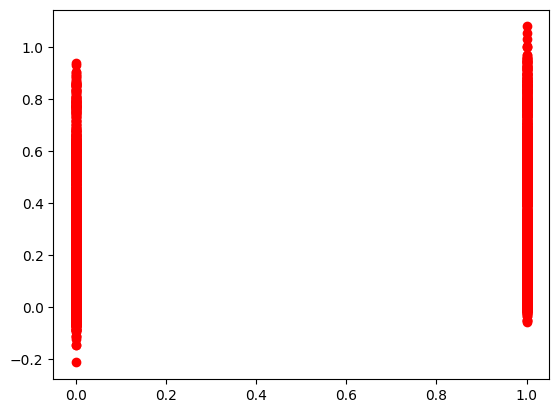

In [79]:
training_evaluation(y_train,y_pred_train)